### Рынок заведений общественного питания Москвы
___
##### Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов? Партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.
___
###### Данное исследование разделим на несколько шагов. 

#### Шаг 1. Загрузка данных, изучение общей информации, подготовка данных: 
* [1.1. Загрузка библиотек, открытие и сохранение файла](#1-bullet)
* [1.2. Получение и рассмотрение общей информации о таблице](#2-bullet)
* [1.3. Проверка типов данных в таблице](#3-bullet)

#### Шаг 2. Анализ данных:
* [2.1. Исследование соотношения видов объектов общественного питания по количеству](#4-bullet)
* [2.2. Исследование соотношения сетевых и несетевых заведений по количеству](#5-bullet)
* [2.3. Для какого вида объекта общественного питания характерно сетевое распространение?](#6-bullet)
* [2.4. Что характерно для сетевых заведений?](#7-bullet)
* [2.5. Среднее количество посадочных мест по объектам общественного питания](#8-bullet)
* [2.6. Выделение в отдельный столбец информации об улице](#9-bullet)
* [2.7. ТОП-10 улиц по количеству объектов общественного питания](#10-bullet)
* [2.8. Нахождение числа улиц с одним объектом общественного питания](#11-bullet)
* [2.9. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#12-bullet)

#### Шаг 3. Общий вывод:
* [3.1. Общие выводы исследования объектов общественного питания Москвы](#13-bullet)
* [3.2. Рекомендации о виде заведения, количестве посадочных мест и районе расположения](#14-bullet)

### Шаг 1. Откроем файлы с данными и изучим общую информацию

<a id='1-bullet'></a>
#### 1.1. Загрузка библиотек, открытие и сохранение файла

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('/datasets/rest_data.csv')

from io import BytesIO
import requests
spreadsheet_id = '1XJ2y1JhOpgmB6vJl4c5m00zaXTv-dOQMsHa2aQmaNSo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz = pd.read_csv(BytesIO(r.content))

<a id='2-bullet'></a>
#### 1.2. Получение и рассмотрение общей информации о таблице

In [2]:
# рассмотрим общую информацию о таблице
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
# проверим на дубликаты
data.duplicated().sum()

0

Дубликатов в привычном понимании в датафрейме нет, но если посмотреть внимательней на названия объектов общественного питания, то можно заметить, что одни и те же некоторые объекты называются по-разному: например, МАКДОНАЛЬДС, Макдональдс, McDonald's.  
Соответственно такая ошибка могла произойти, если данные собирались из нескольких источников или было несколько ответственных за их заполнения, но стандартов названий не было, поэтому каждый заполнял название заведения "как ему хочется".  
В текущем проекте мы не будем стандартизировать имена объектов, но будем это иметь в виду. Скорее всего бОльшая часть ошибок в названии нивелируется размерами базы, но если эти ошибки и приведут к каким-либо завышениям в долях, то они не выглядят критичными, чтобы подвергнуть под сомнения проведенный анализ.

In [4]:
data['object_name'].value_counts().head(30)

Столовая                    267
Кафе                        236
Шаурма                      234
KFC                         155
Шоколадница                 142
Бургер Кинг                 122
Макдоналдс                  122
Домино'с Пицца               86
Теремок                      84
Крошка Картошка              82
Пекарня                      76
Милти                        65
Суши Wok                     61
Буфет                        59
СТОЛОВАЯ                     52
Папа Джонс                   50
Школьно-базовая столовая     44
Кофе с собой                 44
Чайхона №1                   42
КАФЕ                         41
Выпечка                      36
Кафетерий                    35
Хинкальная                   35
Якитория                     33
Додо Пицца                   31
Кофе Хаус                    31
Starbucks                    30
МАКДОНАЛДС                   29
Кофейня                      29
Subway                       29
Name: object_name, dtype: int64

In [5]:
# проверим на пропущенные значения
data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

<a id='3-bullet'></a>
#### 1.3. Проверка типов данных в таблице

In [6]:
# проверим типы переменных
data.dtypes

id              int64
object_name    object
chain          object
object_type    object
address        object
number          int64
dtype: object

Датафрейм относительно **"чистый"** - дубликатов и пропущенных значений **обнаружено не было**. Все типы переменных также установлены правильно. Единственный минус - неунифицированные имена заведений, который мы описали чуть выше.   
Можем переходить к анализу. 

In [7]:
data.drop('id', axis = 1)[data.drop('id', axis = 1).duplicated()]

,object_name,chain,object_type,address,number
2381,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3481,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
...,...,...,...,...,...
14578,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


### Шаг 2. Анализ данных:

<a id='4-bullet'></a>
#### 2.1. Исследование соотношения видов объектов общественного питания по количеству

In [8]:
# переименуем предприятия быстрого обслуживания в фастфуд
data.loc[data['object_type']=='предприятие быстрого обслуживания', 'object_type']='фастфуд'

# выделим объекты общественного питания в отдельный датафрейм и посчитаем сколько каждого вида
objects = data.groupby('object_type').agg({'object_type':'count'})
objects.columns=['count']
objects = objects.sort_values(by='count',ascending=False)
objects=objects.reset_index()
objects

,object_type,count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,фастфуд,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


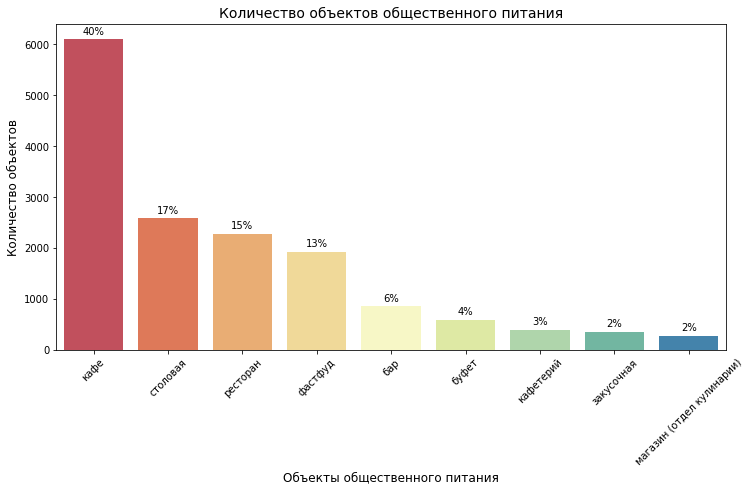

In [9]:
# построим график
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart=sns.barplot(x='object_type',y='count',estimator=max,data=objects,palette='Spectral')
plt.title('Количество объектов общественного питания',fontsize=14)
plt.xlabel('Объекты общественного питания',fontsize=12)
plt.ylabel('Количество объектов',fontsize=12)
plt.xticks(rotation=45)

# добавим подписи столбцам графика
for p in ax.patches:
    height = p.get_height()
    sum=objects['count'].sum()
    ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+100, 
 s = '{:.0%}'.format(height/sum), 
 ha ='center') 

plt.show()

Около 40% заведений в Москве - **кафе**. На втором и третьем месте идут **столовые и рестораны**. Предприятия быстрого обслуживания незначительно уступают первым трем типам объектов.   

<a id='5-bullet'></a>
#### 2.2. Исследование соотношения сетевых и несетевых заведений по количеству

In [10]:
# соберем отдельный датафрейм с переменной, отвечающей за принадлежность к сети 
network = data.groupby('chain').agg({'chain':'count'})
network.columns=['count']
network

,count
chain,
да,2968
нет,12398


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


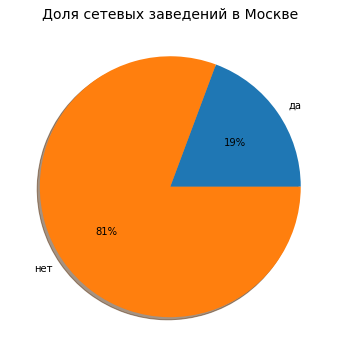

In [11]:
# строим график
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)
plt.pie(network,autopct='%.0f%%',shadow=True, labels=network.index)
plt.title('Доля сетевых заведений в Москве',fontsize=14)
plt.show()

Только **пятая часть всех заведений в Москве** является сетевыми. 

<a id='6-bullet'></a>
#### 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?

In [12]:
# создадим датафрейм сетевых заведений
chain=data.query('chain == "да"')

In [13]:
# посмотрим сколько сетевых заведений есть в каждом типе объектов
chain_objects=chain.groupby('object_type').agg({'object_type':'count'})
chain_objects.columns=['chain_count']
chain_objects=chain_objects.reset_index()

In [14]:
# смержем датафрей с количеством сетевых объектов с общим датафреймом объектов 
objects_full=objects.merge(chain_objects, on='object_type', how='left')
objects_full.columns=['objects_type','count','chain_count']
objects_full['chain_ratio']=objects_full['chain_count']/objects_full['count']
objects_full=objects_full.sort_values(by='chain_ratio',ascending=False)
objects_full.sort_values(by='chain_ratio', ascending=False).style.format({'chain_ratio':'{:.0%}'})

,objects_type,count,chain_count,chain_ratio
3,фастфуд,1923,791,41%
8,магазин (отдел кулинарии),273,78,29%
2,ресторан,2285,544,24%
0,кафе,6099,1396,23%
7,закусочная,360,56,16%
6,кафетерий,398,52,13%
4,бар,856,37,4%
5,буфет,585,11,2%
1,столовая,2587,3,0%


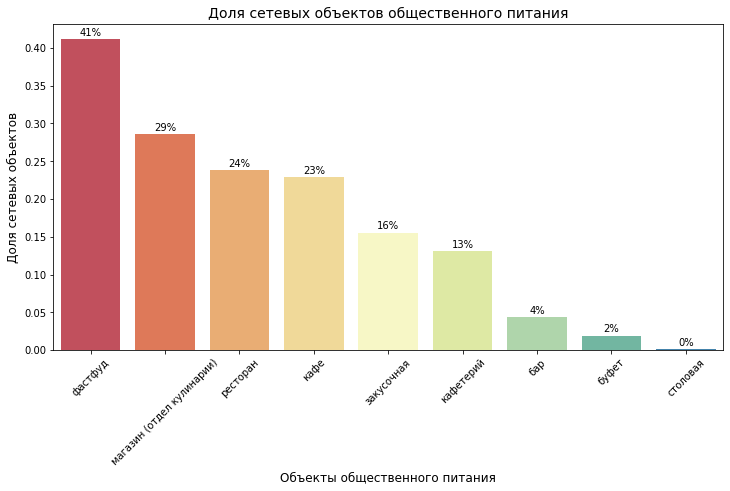

In [15]:
# построим график
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart = sns.barplot(x='objects_type',y='chain_ratio',data=objects_full,palette='Spectral')
plt.title('Доля сетевых объектов общественного питания',fontsize=14)
plt.xlabel('Объекты общественного питания',fontsize=12)
plt.ylabel('Доля сетевых объектов',fontsize=12)
plt.xticks(rotation=45)

# добавим подписи столбцам графика
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.005, 
 s = '{:.0%}'.format(height), 
 ha ='center') 

plt.show()

Как можно заметить из графика для сетей характерен **в первую очередь** такой объект общественного питания как **фастфуд (предприятия быстрого обслуживания)** - 41% объектов являются сетевыми. На втором месте идет **магазин (отдел кулинарии)** - почти 30% являются сетевыми. На следующих местах идут ресторан и кафе, где сетевыми являются около четверти объектов.

<a id='7-bullet'></a>
#### 2.4. Что характерно для сетевых заведений?

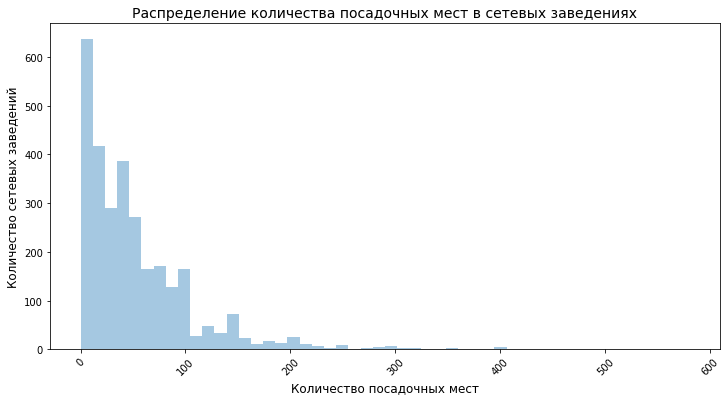

In [16]:
# построим распределение количества посадочных мест в сетевых заведениях
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart = sns.distplot(chain['number'], norm_hist=False, kde=False)
plt.title('Распределение количества посадочных мест в сетевых заведениях',fontsize=14)
plt.xlabel('Количество посадочных мест',fontsize=12)
plt.ylabel('Количество сетевых заведений',fontsize=12)
plt.xticks(rotation=45)
plt.show()

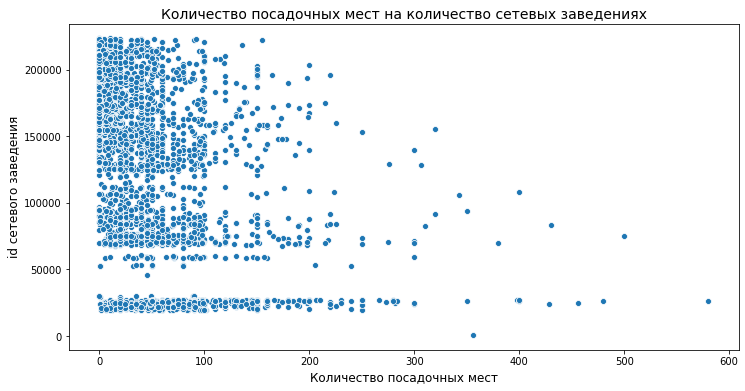

In [17]:
# построим scatter plot
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(x='number',y='id',data=chain)
plt.title('Количество посадочных мест на количество сетевых заведениях',fontsize=14)
plt.xlabel('Количество посадочных мест',fontsize=12)
plt.ylabel('id сетевого заведения',fontsize=12)
plt.show()

In [18]:
chain['number'].median()

40.0

В среднем для сетевых заведений москвы характерны объекты с **не более, чем 40 местами**.  
Далее посмотрим, сохраняется ли такой тренд для ТОП-10 сетевых ресторанов по количеству заведений.

In [19]:
# выделим ТОП-10 сетевых ресторанов
top10chain=chain.groupby('object_name').size().reset_index(name='count').sort_values(by='count',ascending=False).head(10)
top10chain_list=top10chain['object_name']
top10chain

,object_name,count
30,KFC,155
702,Шоколадница,141
418,Макдоналдс,122
127,Бургер Кинг,122
195,Домино'с Пицца,86
653,Теремок,84
384,Крошка Картошка,82
428,Милти,65
629,Суши Wok,61
473,Папа Джонс,50


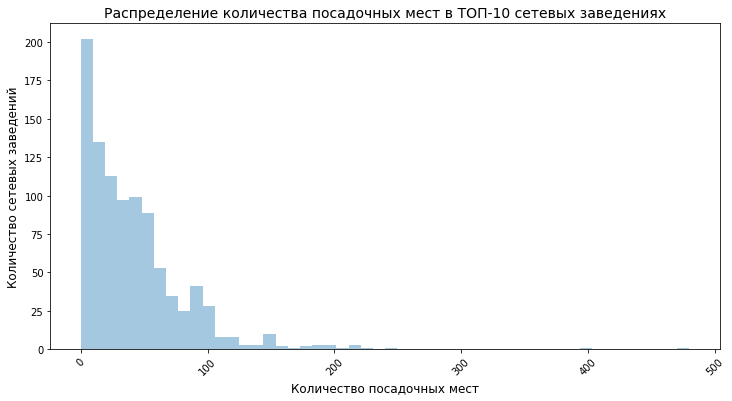

In [20]:
# построим распределение
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart = sns.distplot(chain.query('object_name in @top10chain_list')['number'], norm_hist=False, kde=False)
plt.title('Распределение количества посадочных мест в ТОП-10 сетевых заведениях',fontsize=14)
plt.xlabel('Количество посадочных мест',fontsize=12)
plt.ylabel('Количество сетевых заведений',fontsize=12)
plt.xticks(rotation=45)
plt.show()

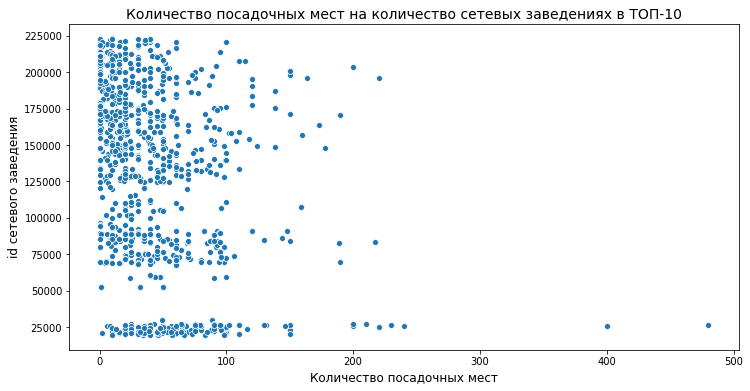

In [21]:
# построим scatter plot
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(x='number',y='id',data=chain.query('object_name in @top10chain_list'))
plt.title('Количество посадочных мест на количество сетевых заведениях в ТОП-10',fontsize=14)
plt.xlabel('Количество посадочных мест',fontsize=12)
plt.ylabel('id сетевого заведения',fontsize=12)
plt.show()

In [22]:
chain.query('object_name in @top10chain_list')['number'].median()

30.0

Для самых популярных сетевых объектов все-таки более характерны **объекты с числом мест 30 или меньше**.  
Возможно потому что популярные сети открывают свои объекты в местах с повышенным человекопотоком, а в таких местах бОльшие площади не доступны.     

<a id='8-bullet'></a>
#### 2.5. Среднее количество посадочных мест по объектам общественного питания

In [23]:
# создадим датафрейм со средним количеством мест по типу объекта
objects_number=data.groupby('object_type')['number'].agg({'number':'median'}).sort_values(by='number', ascending=False)
objects_number

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,number
object_type,
столовая,103
ресторан,80
бар,35
буфет,32
кафе,30
кафетерий,6
фастфуд,5
закусочная,0
магазин (отдел кулинарии),0


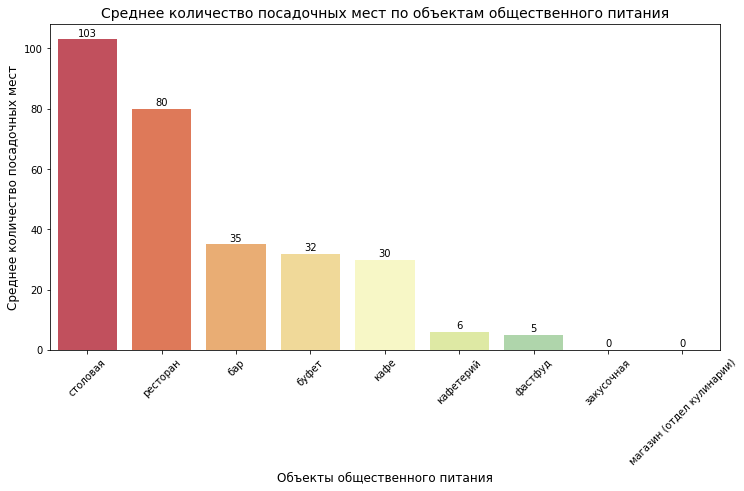

In [24]:
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart = sns.barplot(x=objects_number.index,y='number',data=objects_number,palette='Spectral')
plt.title('Среднее количество посадочных мест по объектам общественного питания',fontsize=14)
plt.xlabel('Объекты общественного питания',fontsize=12)
plt.ylabel('Среднее количество посадочных мест',fontsize=12)
plt.xticks(rotation=45)

# добавим подписи столбцам графика
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+1, 
 s = '{:.0f}'.format(height), 
 ha ='center') 
    
plt.show()

Больше всего мест в среднем в Москве у **столовых и ресторанов**: 103 и 80 соответственно. В свою очередь у баров, буфетов и кафе примерно одинаково - в среднем около 30 мест. Места в закусочных и отделах кулинарии в магазине и вовсе в среднем не предлагают мест своим покупателям.  

<a id='9-bullet'></a>
#### 2.6. Выделение в отдельный столбец информации об улице

In [25]:
# напишем регулярное выражение для выделения данных об улице
data['streetname'] = data['address'].str.extract\
('(((\d.)?[А-я0-9\s]+)?(дом|улица|переулок|проезд|шоссе|бульвар|проспект|набережная|площадь|аллея|корпус|деревня)([А-я0-9\s]+)?)')[0].str.strip()
data[['address','streetname']]

,address,streetname
0,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица
...,...,...
15361,"город Москва, 3-й Крутицкий переулок, дом 18",3-й Крутицкий переулок
15362,"город Москва, улица Земляной Вал, дом 33",улица Земляной Вал
15363,"город Москва, улица Земляной Вал, дом 33",улица Земляной Вал
15364,"город Москва, поселение Московский, Киевское ш...",Киевское шоссе


In [26]:
# проверка
data['streetname'].isna().sum()

31

31 пропущенным значением в целом можно принебречь. 

<a id='10-bullet'></a>
#### 2.7. ТОП-10 улиц по количеству объектов общественного питания

In [27]:
# датафрейм с ТОП-10 улицами по количеству объектов на них
top10streets=data.groupby('streetname')['object_type'].agg({'object_type':'count'}).sort_values(by='object_type',ascending=False).head(10).reset_index()
top10streets

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,streetname,object_type
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


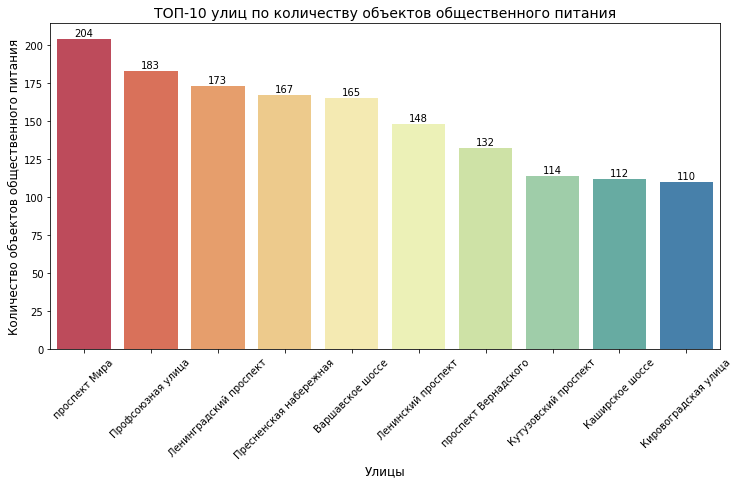

In [28]:
# строим график
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart = sns.barplot(x='streetname',y='object_type',data=top10streets,palette='Spectral')
plt.title('ТОП-10 улиц по количеству объектов общественного питания',fontsize=14)
plt.xlabel('Улицы',fontsize=12)
plt.ylabel('Количество объектов общественного питания',fontsize=12)
plt.xticks(rotation=45)

# добавим подписи столбцам графика
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+2, 
 s = '{:.0f}'.format(height), 
 ha ='center') 
    
plt.show()

Больше всего объектов общественного питания находится на **проспекте Мира, Профсоюзной улице и Ленинградском проспекте**.  
В целом можно заметить, что почти все улицы занимают достаточно продолжительные и поэтому их нахождение в ТОП по количеству объектов общественного питания не удивляет.  
Но вот наличие в ТОПе Пресненской набережной и Кировоградской улицы заставляет присмотреться к этим районам более детально и подумать почему на этих не столь больших улицах так много объектов общественного питания. 

In [29]:
# создадим датафрейм из открытых данных мосгаза об улицах и округах 
okrug=mosgaz[['streetname','okrug']]

In [30]:
# добавим данные об округах из открытых источников к нашем улицам
top10streets=top10streets.merge(okrug,on='streetname',how='left')
top10streets

,streetname,object_type,okrug
0,проспект Мира,204,СВАО
1,проспект Мира,204,СВАО
2,проспект Мира,204,СВАО
3,проспект Мира,204,СВАО
4,проспект Мира,204,СВАО
5,проспект Мира,204,СВАО
6,проспект Мира,204,ЦАО
7,Профсоюзная улица,183,ЮЗАО
8,Профсоюзная улица,183,ЮЗАО
9,Профсоюзная улица,183,ЮЗАО


Как можно заметить некоторые улицы находятся на территории нескольких округов. В таком случае, если улица проходит в ЦАО, то будем считать её округом ЦАО. В других случаях оставим в качестве округа оставим первый округ, который записан в базе.

In [31]:
# удаление дубликатов
top10streets=top10streets.drop_duplicates().reset_index(drop=True)
top10streets

,streetname,object_type,okrug
0,проспект Мира,204,СВАО
1,проспект Мира,204,ЦАО
2,Профсоюзная улица,183,ЮЗАО
3,Ленинградский проспект,173,САО
4,Пресненская набережная,167,ЦАО
5,Варшавское шоссе,165,ЮАО
6,Варшавское шоссе,165,ЮЗАО
7,Ленинский проспект,148,ЗАО
8,Ленинский проспект,148,ЮАО
9,Ленинский проспект,148,ЮЗАО


In [32]:
# принимаем решение по округам
top10streets=top10streets.drop([0,6,7,8,9,12])
top10streets

,streetname,object_type,okrug
1,проспект Мира,204,ЦАО
2,Профсоюзная улица,183,ЮЗАО
3,Ленинградский проспект,173,САО
4,Пресненская набережная,167,ЦАО
5,Варшавское шоссе,165,ЮАО
10,Ленинский проспект,148,ЦАО
11,проспект Вернадского,132,ЗАО
13,Кутузовский проспект,114,ЗАО
14,Каширское шоссе,112,ЮАО
15,Кировоградская улица,110,ЮАО


In [33]:
# финальные округа для улиц
top10streets.reset_index(drop=True)

,streetname,object_type,okrug
0,проспект Мира,204,ЦАО
1,Профсоюзная улица,183,ЮЗАО
2,Ленинградский проспект,173,САО
3,Пресненская набережная,167,ЦАО
4,Варшавское шоссе,165,ЮАО
5,Ленинский проспект,148,ЦАО
6,проспект Вернадского,132,ЗАО
7,Кутузовский проспект,114,ЗАО
8,Каширское шоссе,112,ЮАО
9,Кировоградская улица,110,ЮАО


По три улицы находится в ЦАО и ЮАО, 2 улицы - в ЗАО и еще по одной в ЮЗАО и САО. 

In [34]:
# создадим датафрейм из открытых данных мосгаза об улицах и районах 
area=mosgaz[['streetname','area']]

In [35]:
top10streets2=top10streets.merge(area,on='streetname',how='left')
top10streets2

,streetname,object_type,okrug,area
0,проспект Мира,204,ЦАО,Алексеевский район
1,проспект Мира,204,ЦАО,Ярославский Район
2,проспект Мира,204,ЦАО,Район Марьина роща
3,проспект Мира,204,ЦАО,Останкинский район
4,проспект Мира,204,ЦАО,Район Ростокино
5,проспект Мира,204,ЦАО,Район Свиблово
6,проспект Мира,204,ЦАО,Мещанский район
7,Профсоюзная улица,183,ЮЗАО,Академический район
8,Профсоюзная улица,183,ЮЗАО,Район Черемушки
9,Профсоюзная улица,183,ЮЗАО,Район Ясенево


<a id='11-bullet'></a>
#### 2.8. Нахождение числа улиц с одним объектом общественного питания

In [36]:
# выделим улицы только с одним объектом общественного питания
bottomstreets=data.groupby('streetname')['object_type'].agg({'object_type':'count'}).query('object_type == 1')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [37]:
# добавим район
bottomstreets=bottomstreets.merge(area,on='streetname',how='left')

In [38]:
# удалим дубликаты и пропущенные значения
bottomstreets=bottomstreets.drop_duplicates()

In [39]:
bottomstreets=bottomstreets.dropna()

Всего было обнаружено 492 улицы Москвы только с одним объектом общественного питания. Далее, посмотрим в каких районах расположены эти улицы. 

In [40]:
# сформируем ТОП районов, в которых находятся улицы с 1 объектом
bottomarea=bottomstreets.groupby('area')['object_type'].sum().to_frame().sort_values('object_type',ascending=False).reset_index().drop([9])
bottomarea=bottomarea.query('object_type > 10')
bottomarea

,area,object_type
0,Таганский район,25
1,Район Хамовники,24
2,Басманный район,21
3,Тверской район,20
4,Пресненский район,19
5,Район Арбат,18
6,Район Марьина роща,17
7,Мещанский район,16
8,Район Замоскворечье,14
10,Даниловский район,11


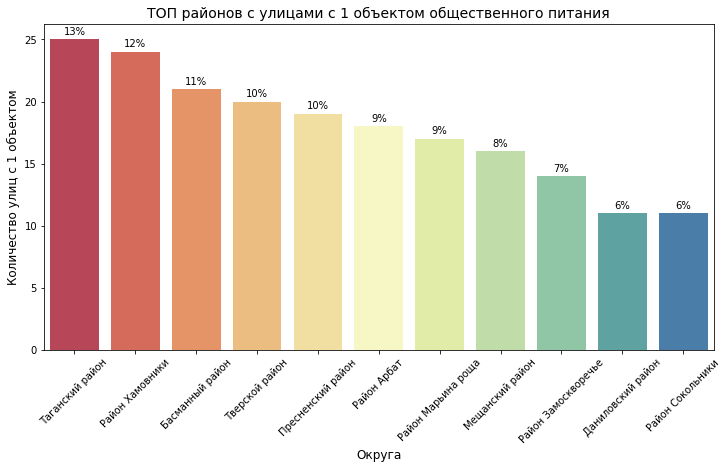

In [41]:
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart = sns.barplot(x='area',y='object_type',data=bottomarea,palette='Spectral')
plt.title('ТОП районов с улицами с 1 объектом общественного питания',fontsize=14)
plt.xlabel('Округа',fontsize=12)
plt.ylabel('Количество улиц с 1 объектом',fontsize=12)
plt.xticks(rotation=45)

# добавим подписи столбцам графика
for p in ax.patches:
    height = p.get_height()
    sum=bottomarea['object_type'].sum()
    ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.4, 
 s = '{:.0%}'.format(height/sum), 
 ha ='center') 

plt.show()

**Почти половина улиц** с одним объектом общественного питания находится **в Таганском, Хамовниках, Басманном и Тверском районах**.  
Это можно объяснить тем, что в центре города открывать объекты общественного питания более престижно и видимо, чтобы как-то бороться с высокой конкуренцией хозяины объектов вынуждены их открывать на "новых" улицах. 

<a id='12-bullet'></a>
#### 2.9. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [42]:
# создаем series с названиями ТОП-10 улиц с наибольшим количеством объектов общественного питания
top10streets_list=top10streets['streetname']

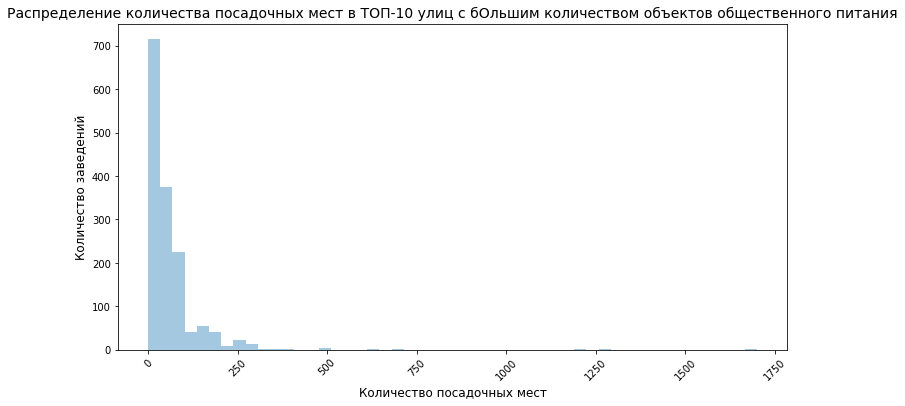

In [43]:
# 
dims = (12, 6)
fig, ax = plt.subplots(figsize=dims)
chart3 = sns.distplot(data.query('streetname in @top10streets_list')['number'], norm_hist=False, kde=False)
plt.title('Распределение количества посадочных мест в ТОП-10 улиц с бОльшим количеством объектов общественного питания',fontsize=14)
plt.xlabel('Количество посадочных мест',fontsize=12)
plt.ylabel('Количество заведений',fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [44]:
data.query('streetname in @top10streets_list')['number'].median()

38.5

В среднем в ТОП-10 улиц с большим количеством объектов общественного питания в объектах находится **не более 40** посадочных мест.  
Это **похоже на распределение мест по сетевым объектам** общественного питания. Интересно было бы посмотреть на преобладающие типы объектов на этих улицах. Возможно, большинство окажется именно сетевыми объектами.

### Шаг 3. Общий вывод:

<a id='13-bullet'></a>
#### 3.1. Общие выводы исследования объектов общественного питания Москвы

 - **Кафе** самый популярный тип объектов общественного питания в Москве - около **40% заведений** именно такого типа.
 - **Сетевыми** объектами чаще всего становятся **предприятия быстрого обслуживания** (40% от всех заведений), кафе и рестораны чуть реже - в Москве **около 20% сетевых заведений**.
 - Сетевым заведениям характерно иметь **не более 40 посадочных мест в зале**. В то же время у ТОП-10 (по количеству заведений) заведений посадочных мест чуть меньше - **не более 30**.
 - В тоже время **в среднем в Московских кафе 30 посадочных мест**. Лидером по количеству посадочных мест являются столовые (более 100). Также сильно отличаются рестораны - в среднем по 80 мест. 
 - **Самые популярные** улицы с объектами общественного питания - это **проспект Мира, Профсоюзная улица, Ленинградский проспект**. Можно заметить, что больше всего объектов общественного питания на улицах "широкого" типа с достаточной протяженностью. Но в ТОП-10 также попали Пресненская набережная и Кировоградская улица, которые очевидно выделяются на фоне других улиц.   
 **6** самых популярных улиц находятся в **ЦАО или ЮАО**.  
 - Что касается улиц, на которых расположен только **один объект** общественного питания, то однозначным лидером здесь представляетя **ЦАО** - треть таких улиц расположена в этом округе. 

<a id='14-bullet'></a>
#### 3.2. Рекомендации о виде заведения, количестве посадочных мест и районе расположения

Видится, что самым подходящим типом заведения должно стать маленькое кафе на 20-30 человек в районе ЦАО на какой-нибудь из красивых улиц без богатого выбора мест, где можно подкрепиться. Чтобы люди могли гуляя, случайно посетить его, и когда они обнаружат, что их обслуживают роботы, о новом месте по городу разойдется молва, и уже новые гости смогут совместить приятную прогулку в центре Москвы с посещениям инновационного кафе.  
Учитывая, небольшой формат кафе его будет достаточно легко "превратить" в сетевое. Возможно даже с некоторым упрощением в предприятия быстрого обслуживания, учитывая, что посетителей будут обслуживать роботы, человеческий фактор отойдет на второй план, и скорость обслуживания может стать ключевой особенностью предприятия, ради которой посетители будут возвращаться снова и снова. В таком случае и территориальное расположение можно будет рассмотреть в более массовых местах.  